# Analysis on YouTube Trending Videos

Research has shown that millenials & Gen-Z generation are no longer watching traditional media. What used to tred  on TV and in movie theatres does not have the same impact it used to on reaching a younger wider audience. According to a survey conducted by Business Insider, YouTube is the second largest social media platform among young people, and 62% of the survery respondents reported that they watch YouTube on a daily basis (Green).

YouTube is one of the world's largest social media networks. 20% of the total web traffic is traffic that goes to YouTube, moreover, YouTube alone accounts to 10% of internet traffic (Thelwall, Sud & Vis). Considering the importance of YouTube as a platform & the popularity of YouTube among young generations, in this project, we would like to explore analyze data from the top trending videos in Canada, UK and USA to understand what the audience in these countries seek the most and how long videos remain on the trending leaderboards.

## Literature Review


Various studies had been done over the years to study the length, trends, and content of the videos in YouTube. Data analysis helps us understand more about the patterns behind the trending YouTube videos and how it happened. Starting with the collection of data from the YouTube website such as number of views, name of videos, number of likes and dislikes and the comments of a video. One well known approach to extract these data is by using the YouTube Data API (Amudha et.al, 2020; Bartl, 2018; Krishna et.al, 2013; Merla & Liang, 2017; Poche et.al, 2017).  In a study conducted by Nima (2019), the data is obtained by both the Youtube Data API and a dataset available in the Kaggle website. There were some inconsistencies arose from the data collected in the API. "Data cleanup may be a method to "clean" the knowledge the info the information by smoothing buzzing data and filling in missing values" (Amudha et.al, 2020).

Data analysis can be carried out in many ways depending on the questions selected at the beginning of each study. Using the right method and analytical tool are important to be able to optimize the data analysis process to gain valuable insights. In a study done by Bartl (2018), the dataset used in the study are almost like the ones being used in this study. The dataset contained columns for year, name of channels, date uploaded and views by video category. The study mainly focused on exploratory data analysis by studying the increasing trends of videos by category in 10 years. Statistical sampling technique was used to avoid getting unbiased data throughout the research. Another study conducted by Amudha et.al (2020), performed data analysis and visualizations using the Anaconda Jupyter Notebook. In addition, some data mining algorithms were used for tracking patterns, classification and association mining.

Machine learning was also adopted in some of the research after the exploratory data analysis process. For example, Naïve Bayes Classification technique was applied for sentiment analysis of YouTube videos’ comments (Krishna et.al, 2013; Poche et.al, 2017) and multivariate linear regression model was used to forecast future insights from historical data (Pinto et.al, 2013). Due to the large amount of data needed for analyzing, some additional analytical software was needed to process the big data. Apache Hadoop was chosen provided easier analysis for big data and supported flexibility & high amount of storage (Merla & Liang, 2017).

## Data Acquisition

In order to get the data for our research, we made use of YouTube video trends dataset that is publically available on Kaggle. The dataset is available under public domain license and it shows YouTube trending videos history for period between 14th November 2017 and 14th June 2018 for multiple countries. For our analysis, we have decided to use the available data for English speaking countries. 

## Initial Questions

Our dataset contains data for three English speaking countries, United States, Canada and Great Britain. We had a few questions for each country individually, and a few questions for the overall trend


1. What are the top 10 categories of videos in each country and overall based on average video views on the final day of trending?
2. Which channel has the most views on average in each country and overall based on the videos' last appearance on the trending list? 
3. How many likes and dislikes do the top 10 trending videos have in each country, and overall (top 10 based on final number of views)?
4. How many videos have more than 100 million views on their final trending day in each country and overall?
5. What are the most popular hashtags overall and in each country based on the videos' final view count?

## Data Cleaning

The data available from Kaggle is presented in two seperate files for each country, a CSV file that contains the list of videos and their details, and a JSON file that contains description of the video categories.
<br />
We used Pandas in order to read the data and clean it. To get the categories that each video belongs to, we have to join the categories data to the videos data for each country individually.

We import Pandas and define the schema for the data in the CSV files since CSV files do not have any data type specifications, and we do not want Pandas to auto-detect the CSV files' schemas to avoid having data imported with the wrong data types.

In [1]:
import json
from datetime import datetime
import matplotlib #we'll only use this to determine the matplotlib version number
import matplotlib.pyplot as plt  # the graphing library
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library
from pandas import DataFrame, read_csv, Series # specific functions from pandas
import seaborn as sns # Makes graphs look pretty
import sys #we'll only use this to determine the python version number
import statsmodels.api as sm
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

data_schema = {
    'video_id':str,
    'trending_date':str,
    'title':str,
    'channel_title':str,
    'category_id':int,
    'publish_time':str,
    'tags':str,
    'views':int,
    'likes':int,
    'dislikes':int,
    'comment_count':int,
    'thumbnail_link':str,
    'comments_disabled':bool,
    'ratings_disabled':bool,
    'video_error_or_removed':bool,
    'description':str
}


We define the list of files that we want to read for each country, create a loop to import the files for each country individually

In [2]:
final_df = pd.DataFrame()

categories = [
    'CA_category_id.json',
    'GB_category_id.json',
    'US_category_id.json'
]
data_files = [
    'CAvideos.csv',
    'GBvideos.csv',
    'USvideos.csv'
]
countries = ['CA', 'GB', 'US']

We import the categories file using `json.load()` which will load the data from a JSON string (in this case, the input file) and convert it to a python object. we can then use `pandas.json_normalize()` to create a dataframe from the JSON contained in the python object.
<br />
<br />
We only need the category ID and the category name from the category data, therefore, we drop all the columns that are not relevant from our dataframe. We then convert the column `id` to numeric value using `pandas.to_numeric()` in order to be able to join category data to the video data since `category_id` is an `int` column in the vides dataframe.
<br />
<br />
We read the videos data using `pandas.read_csv()` while passing the schema we defined previously to the `dtype` parameter. The next step is to join the category data to the videos data with `pandas.merge()` using `category_id` from videos data and `id` from the categories data. We specify the join type as `left` to get left join. This will keep the videos' data in case there is no category details available for the video. We finally add a column for the country code data, and append the temprary dataframes to the empty `final_df` we created earlier.

In [3]:
for i in range(0,3):
    cat_dictionary = {}
    with open(categories[i]) as json_file:
        cat_dictionary = json.load(json_file)

    cat_df = pd.json_normalize(cat_dictionary['items'])
    cat_df = cat_df.drop(['kind', 'etag', 'snippet.channelId', 'snippet.assignable'],axis=1)
    cat_df['id'] = pd.to_numeric(cat_df['id'])
    vid_df = pd.read_csv(data_files[i], dtype=data_schema)
    vid_df = pd.merge(vid_df, cat_df, left_on='category_id', right_on='id', how='left') 
    vid_df['country'] = countries[i]
    final_df = final_df.append(vid_df)

Now that we have all the videos data and the categories data in one dataframe, we do not need to keep the category ID columns that we used to join the data. We can also rename the column that contains the category name from "snippet.title" to "category" using `pandas.DataFrame.rename()` method. Finally, we can display the schema of the dataframe, the number of rows and a sample of the data using `pandas.DataFrame.info()` and `pandas.DataFrame.head()`.

In [4]:
final_df = final_df.drop(['id','category_id'], axis=1)\
    .rename(columns={'snippet.title':'category'})
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120746 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                120746 non-null  object
 1   trending_date           120746 non-null  object
 2   title                   120746 non-null  object
 3   channel_title           120746 non-null  object
 4   publish_time            120746 non-null  object
 5   tags                    120746 non-null  object
 6   views                   120746 non-null  int64 
 7   likes                   120746 non-null  int64 
 8   dislikes                120746 non-null  int64 
 9   comment_count           120746 non-null  int64 
 10  thumbnail_link          120746 non-null  object
 11  comments_disabled       120746 non-null  bool  
 12  ratings_disabled        120746 non-null  bool  
 13  video_error_or_removed  120746 non-null  bool  
 14  description             118268 non-nu

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA


Next, we can start cleaning the data inside the dataframe. This can only happen after looking at a sample of the data to understand what are the issues that the data has. As shown in the previous data sample, `tags` column is stored as a quoted pipe seperated list in a string, so we must split that into a string array with individual tags. In addition, trending date column is stored as a string in `%y.%m.%d` format, and have to convert it to date, and publish time is a timestamp stored as a string that needs to be converted to a timestamp column. 


*   To clean the `tags` data, we first remove the unwanted quotes from the string using `str.replace()`, and then we split the values using `str.split()` with pipe as the seperator character.
*   To clean the `trending_date` data, we use `pandas.to_datetime()` function and pass the format parameter based on the date format obsered in the column
*   To clean the `publish_time` data, wwe can also use `pandas.to_datetime()` function and we pass it the full timestamp format obsered in the column

In [5]:
final_df['tags'] = final_df.iloc[:,5].str.replace('"', '').values
final_df['tags'] = final_df.iloc[:,5].str.split('|').values.tolist()
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'], format='%y.%d.%m')
final_df['publish_time'] = pd.to_datetime(final_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%f')

We then validate our changes by checking the dataframe schema and a sample of the data. As demonstarted below, `trending_date` and `publish_time` are now `datetime64` columns, and we can see from the data sample that `tags` is now a list of strings.

In [6]:
final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120746 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                120746 non-null  object             
 1   trending_date           120746 non-null  datetime64[ns]     
 2   title                   120746 non-null  object             
 3   channel_title           120746 non-null  object             
 4   publish_time            120746 non-null  datetime64[ns, UTC]
 5   tags                    120746 non-null  object             
 6   views                   120746 non-null  int64              
 7   likes                   120746 non-null  int64              
 8   dislikes                120746 non-null  int64              
 9   comment_count           120746 non-null  int64              
 10  thumbnail_link          120746 non-null  object             
 11  comments_disabled       120

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10 17:00:03+00:00,"[Eminem, Walk, On, Water, Aftermath/Shady/Inte...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13 17:00:00+00:00,"[plush, bad unboxing, unboxing, fan mail, idub...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24+00:00,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41+00:00,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09 11:04:14+00:00,"[edsheeran, ed sheeran, acoustic, live, cover,...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,CA


# Exploritory Data Analysis
Looking at the trend of the daily views on trending videos, the early viewing trends resembeled eachother in all three countries, however, towards the end of the observation period, the average daily views in GB surpase US and CA views.

### Avg views on trending videos per country

<AxesSubplot:title={'center':'Avg Views Trend per Country'}, xlabel='trending_date', ylabel='Avg Views'>

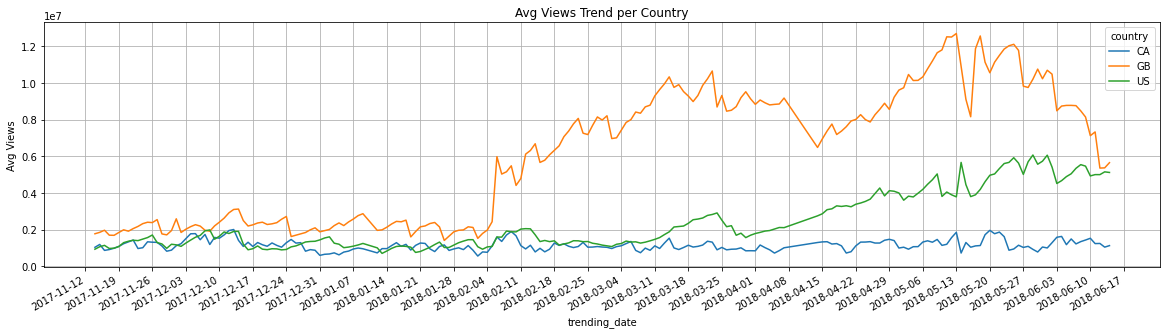

In [7]:
final_df.groupby(by=['country', 'trending_date'], as_index=False)\
    .mean(['views'])\
    .pivot(index='trending_date', columns='country', values='views')\
    .plot.line(
        grid=True, 
        figsize=(20, 5), 
        xticks=pd.date_range(start='2017-11-12', end='2018-06-20', freq='W'),
        ylabel='Avg Views',
        title='Avg Views Trend per Country'
        )

### Min views on trending videos per country

<AxesSubplot:title={'center':'Min views on trending videos per country'}, xlabel='trending_date'>

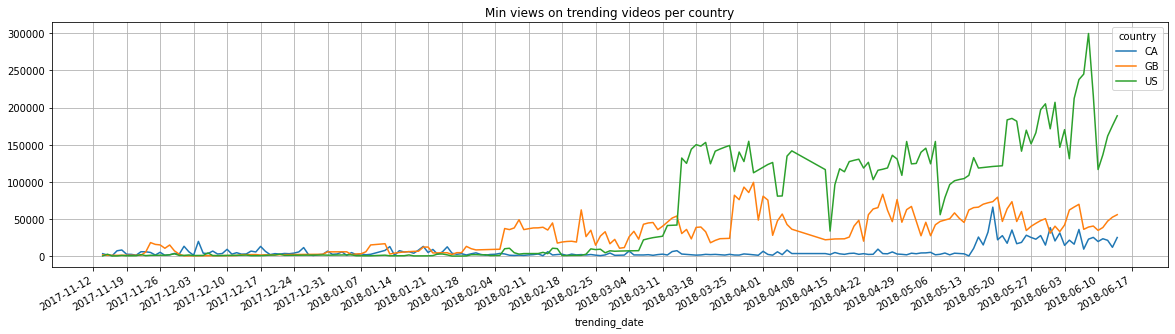

In [8]:
final_df.groupby(by=['country', 'trending_date'], as_index=False)\
    .min(['views'])\
    .pivot(index='trending_date', columns='country', values='views')\
    .plot.line(
        grid=True, 
        figsize=(20, 5), 
        xticks=pd.date_range(start='2017-11-12', end='2018-06-20', freq='W'),
        title="Min views on trending videos per country"
        )

### Min views on trending videos per country

<AxesSubplot:title={'center':'Min views on trending videos per country'}, xlabel='trending_date'>

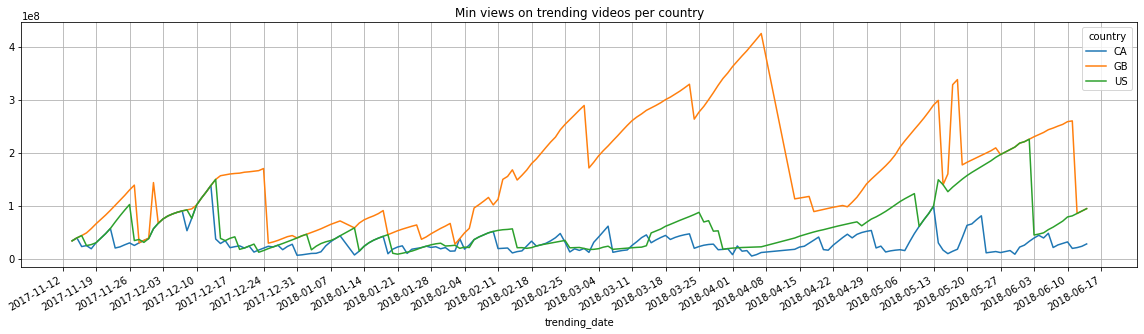

In [9]:
final_df.groupby(by=['country', 'trending_date'], as_index=False)\
    .max(['views'])\
    .pivot(index='trending_date', columns='country', values='views')\
    .plot.line(
        grid=True, 
        figsize=(20, 5), 
        xticks=pd.date_range(start='2017-11-12', end='2018-06-20', freq='W'),
        title="Min views on trending videos per country"
        )

### Word-cloud top 1000 tags based on video views

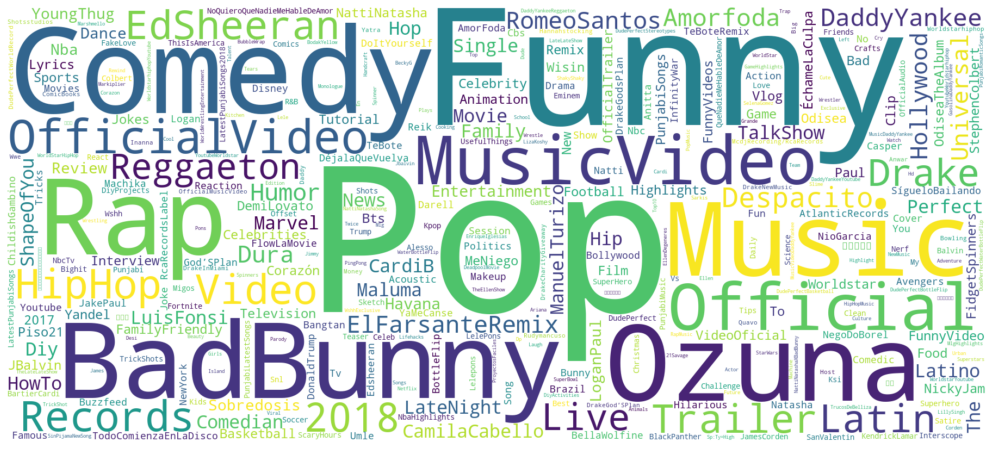

In [10]:
unnested = final_df
unnested.tags = unnested.tags.fillna({t: [] for t in final_df.index})
unnested = unnested.explode('tags').groupby(['tags', 'video_id'], as_index=False).max('views')[['tags','views']]
unnested['tags'] = unnested['tags'].str.title().values
unnested['tags'] = unnested['tags'].str.replace(' ', '').values
unnested = unnested[~unnested.tags.isin(['','[None]', None,])]

grouped = unnested.groupby(by=['tags'], as_index=False)\
    .sum().sort_values(by='views', ascending=False)\
    .reset_index().drop('index', axis=1)

grouped = grouped.head(1000).set_index('tags')
word_dict = grouped.to_dict()

wordcloud = WordCloud(
    width = 1800,
    height =800,
    background_color ='white',
    min_font_size = 8,
    max_words=1000
    ).generate_from_frequencies(word_dict['views'])

plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Boxplot analysis for video views per category

In [11]:
countries = final_df
canada = countries.loc[countries["country"]=="CA"]
gb = countries.loc[countries["country"]=="GB"]
usa = countries.loc[countries["country"]=="US"]

#### US

<AxesSubplot:xlabel='category', ylabel='views'>

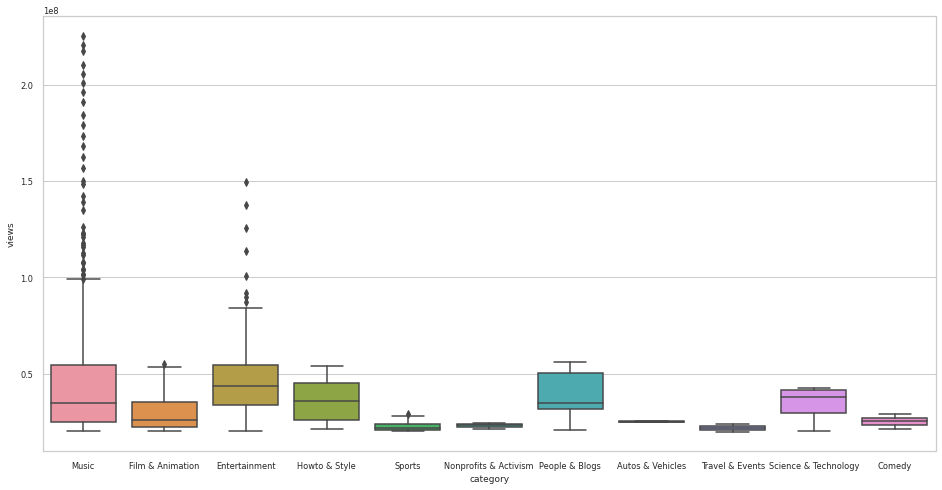

In [12]:
u = usa.loc[usa["views"]>20000000]
sns.set(rc={'figure.figsize':(16,8)},font_scale=0.75, style='whitegrid')
sns.boxplot(x="category", y="views", data=u)

#### CA

<AxesSubplot:xlabel='category', ylabel='views'>

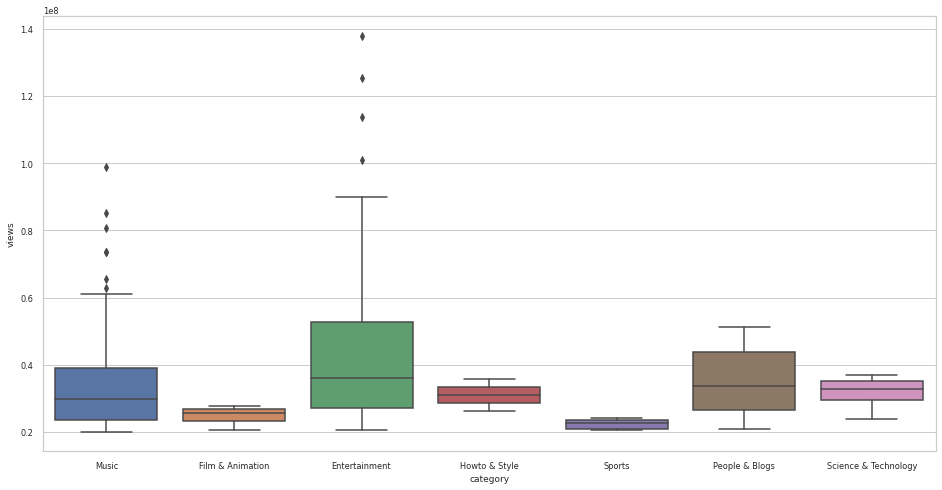

In [13]:
c = canada.loc[canada["views"]>20000000]
sns.set(rc={'figure.figsize':(16,8)},font_scale=0.75, style='whitegrid')
sns.boxplot(x="category", y="views", data=c)

#### GB

<AxesSubplot:xlabel='category', ylabel='views'>

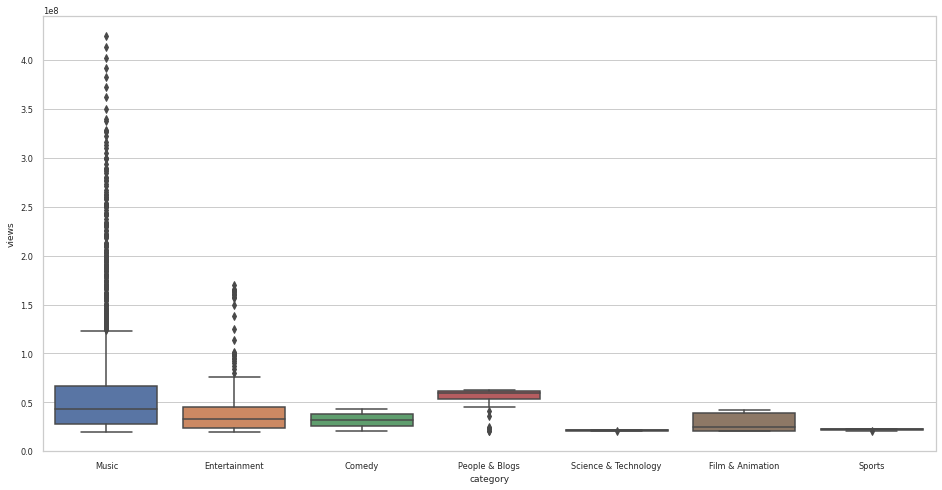

In [14]:
g = gb.loc[gb["views"]>20000000]
sns.set(rc={'figure.figsize':(16,8)},font_scale=0.75, style='whitegrid')
sns.boxplot(x="category", y="views", data=g)

## Find a correlation

A correlation is to determine the strength of the linear relationship between two or more variables. 
For a quick and simple summary of the direction and strength of pairwise relationships between two or more numeric variables which are views, likes, and dislikes. For this analysis, we chose to draw the correlation between views, likes and dislikes.

**Aim:** To determine the correlation between the number of views against the number of likes and dislikes based on the data on Youtube.

In [15]:
final_df.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.788392,0.410941,0.494107,-0.000541,0.011643,0.009294
likes,0.788392,1.000000,0.451212,0.771310,-0.030478,-0.024946,0.007099
dislikes,0.410941,0.451212,1.000000,0.735253,-0.005806,-0.009621,0.007904
comment_count,0.494107,0.771310,0.735253,1.000000,-0.028972,-0.016709,0.002943
comments_disabled,-0.000541,-0.030478,-0.005806,-0.028972,1.000000,0.329995,-0.003970
ratings_disabled,0.011643,-0.024946,-0.009621,-0.016709,0.329995,1.000000,-0.002433
video_error_or_removed,0.009294,0.007099,0.007904,0.002943,-0.003970,-0.002433,1.000000


**Results:** The result is indicating that the views have a strong positive relationship between the likes on Youtube which is r = 0.789705. While the result between the views and number of dislikes has a weaker relationship which is r = 0.412793.

To visualize the correlation between views, likes and dislikes, `seaborn` library is used to visualize the relationship using heatmap.


<AxesSubplot:>

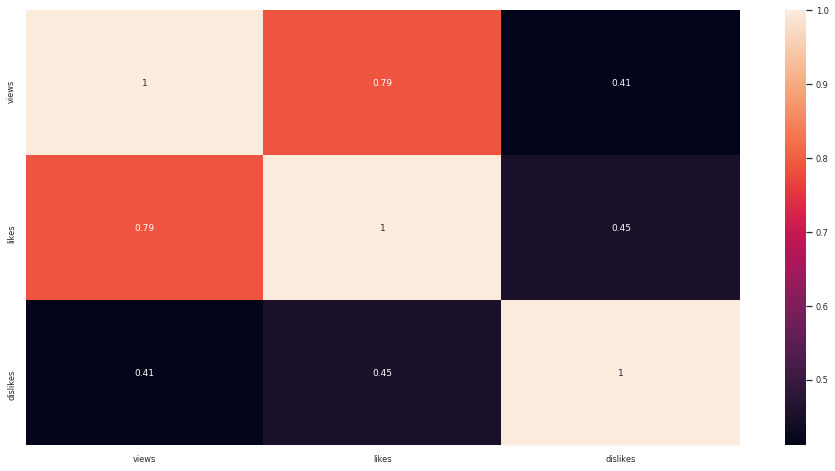

In [16]:
var_corr = final_df[['views', 'likes', 'dislikes']].corr()
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal axis shows the distribution of a single variable, while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. The default pairs plot by itself often gives valuable insights. In scatter plot we can see variable views and likes has positive correlation while views and dislikes is in opposite


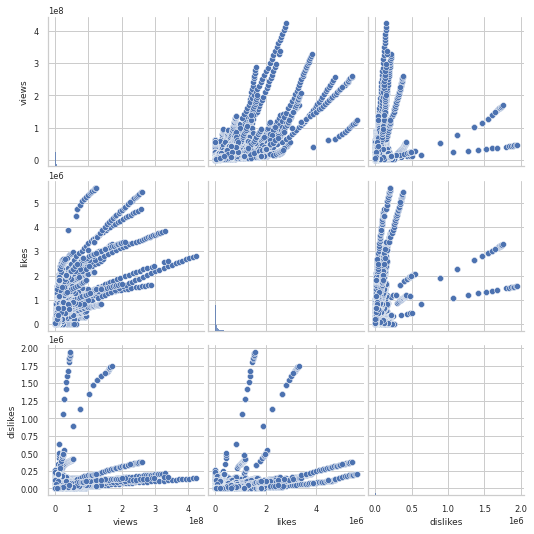

In [17]:
sns.pairplot(final_df[['views', 'likes', 'dislikes']])

### Summary of the data

In [18]:
final_df[['views', 'likes', 'dislikes']].describe()

,views,likes,dislikes
count,1.207460e+05,1.207460e+05,1.207460e+05
mean,3.094371e+06,8.194300e+04,4.392414e+03
std,1.195077e+07,2.544091e+05,3.536104e+04
min,5.490000e+02,0.000000e+00,0.000000e+00
25%,1.957358e+05,3.996000e+03,1.540000e+02
50%,5.915810e+05,1.545050e+04,5.230000e+02
75%,1.842280e+06,5.657850e+04,1.879000e+03
max,4.245389e+08,5.613827e+06,1.944971e+06


## Estimation using simple linear regression

**Aim:** To develop a final model of a linear regression model of the views against a number of likes based on the data in Youtube.

To find the relationship between independant or dependent variables, we ordinary least squares (OLS). OLS will also help:
* Predict values of a continuous response variable using one or more explanatory variables
* Identify the strength of the relationships between variables

The simple linear regression model is a straight line through a set of paired data observations (x1,y1…,xn,yn). In simple linear regression only has one independent variable, x to determine the relationship between x and y is described by a linear function. The changes in y which are dependent variables are related to changes in x, the independent variable. The simple linear regression model is continued after results finding the correlation between variables views and likes has a strong relationship and highly significant views and dislikes.

**R-squared:** The dependent variable is views and the independent variable is liked has resulted in the OLS regression result. R-squared value is to measure the regression line that fits with the real data points. The result is 0.647 which reveals that more than 60% of the data fit the regression model. As the R-squared is closer to 1, the greater is said to be the degree of linear association between x and y variables. It indicated the variation in likes is reduced by 64.7% when the number of views is considered.

**Coefficient:**  This gives the ‘M’ value for the regression line. It tells how many the total likes change with a unit change in views. A positive value means that the two variables are directly proportional. A negative value would have meant that the two variables are inversely proportional. 

**Standard Error:** The result tells how accurate the coefficient value is 0.079. The lower the standard error, the higher the accuracy.

# Sample prediction

Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line. The blue diagonal line in the figure is the regression line and consists of the predicted score on Y for each possible value of X. The vertical lines from the points to the regression line represent the errors of prediction. A scatter plot of the example data. The blue line consists of the predictions, the dots points are the actual data, and the vertical lines between the dots points and the blue line represent errors of prediction. The higher dots point from the blue line therefore the error of prediction is large.


In [19]:
X = final_df['likes']
Y = final_df['views']
X=X.astype(float)
Y=Y.astype(float)
model = sm.OLS(Y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  views   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                          2.197e+05
Date:                Sat, 02 Jan 2021   Prob (F-statistic):                        0.00
Time:                        12:31:37   Log-Likelihood:                     -2.0804e+06
No. Observations:              120746   AIC:                                  4.161e+06
Df Residuals:                  120745   BIC:                                  4.161e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Regression plot (views & likes)

<AxesSubplot:xlabel='views', ylabel='likes'>

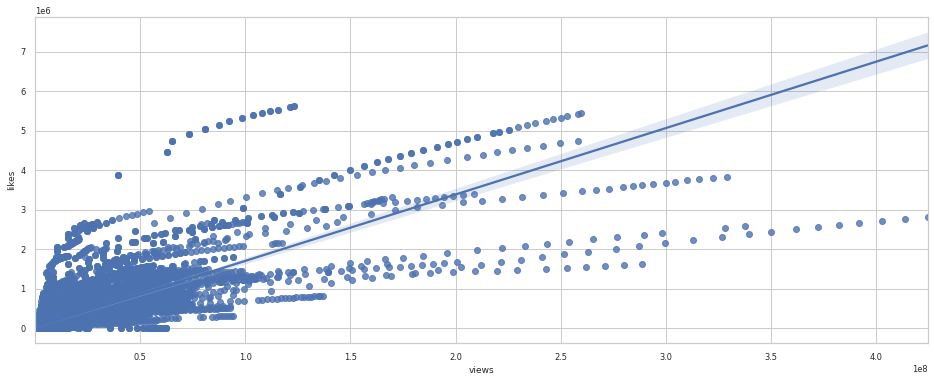

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
#  (18.5, 10.5)
sns.regplot(x='views', y='likes', data=final_df, ax=ax)

### Regression plot (views & dislikes)

<AxesSubplot:xlabel='views', ylabel='dislikes'>

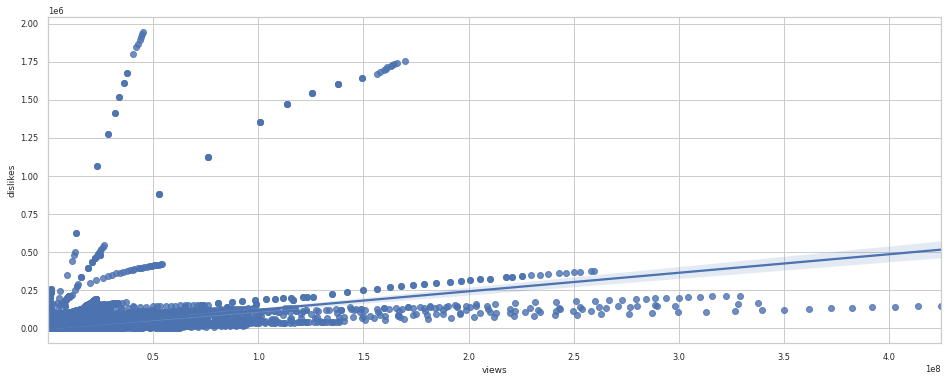

In [21]:
#@title 
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.regplot(x='views', y='dislikes', data=final_df, ax=ax)

# Graphs

#### 1. What are the top 10 categories of videos in each country and overall based on average video views on the final day of trending?

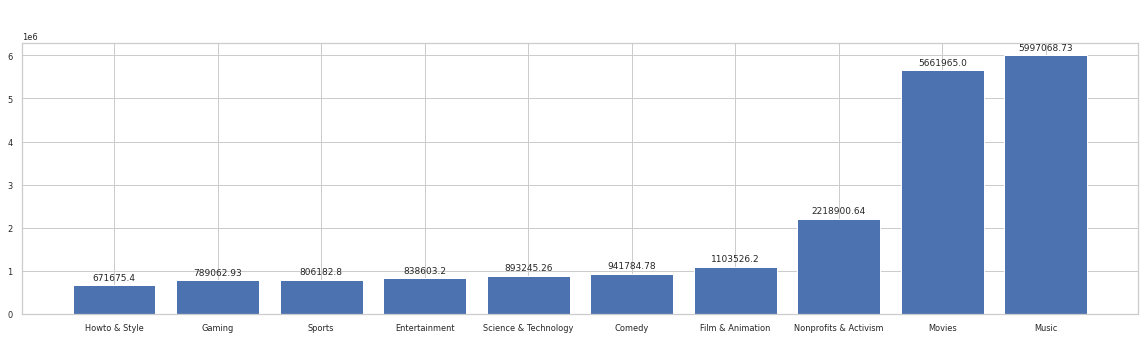

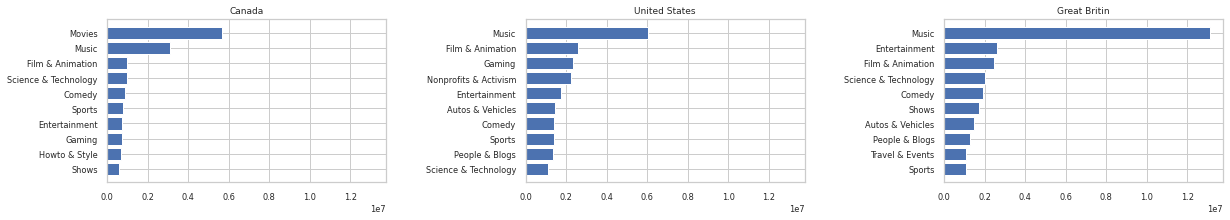

In [22]:
df = final_df.groupby(by=['category', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['category'], as_index=False)\
    ['views'].mean('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
# df.head()
fig, axs = plt.subplots(figsize=(20,5))
rects = axs.bar(df['category'].tolist(), df['views'].tolist())
fig.suptitle(' ')
for rect in rects:
    height = rect.get_height()
    axs.annotate('{}'.format(round(height, 2)),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

ca = final_df[final_df.country.eq('CA')].groupby(by=['category', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['category'], as_index=False)\
    ['views'].mean('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
us = final_df[final_df.country.eq('US')].groupby(by=['category', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['category'], as_index=False)\
    ['views'].mean('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
gb = final_df[final_df.country.eq('GB')].groupby(by=['category', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['category'], as_index=False)\
    ['views'].mean('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(20, 3), sharey=False, sharex=True)
plt.subplots_adjust(wspace=0.5)
axs[0].barh(ca.category, ca.views)
axs[0].title.set_text('Canada')
axs[1].barh(us.category, us.views)
axs[1].title.set_text('United States')
axs[2].barh(gb.category, gb.views)
axs[2].title.set_text('Great Britin')

#### 2. Which channel has the most views on average in each country and overall based on the videos' last appearance on the trending list?

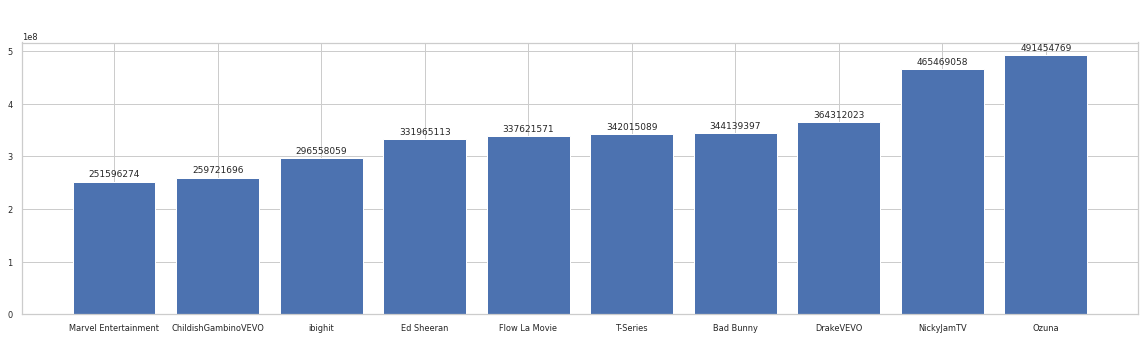

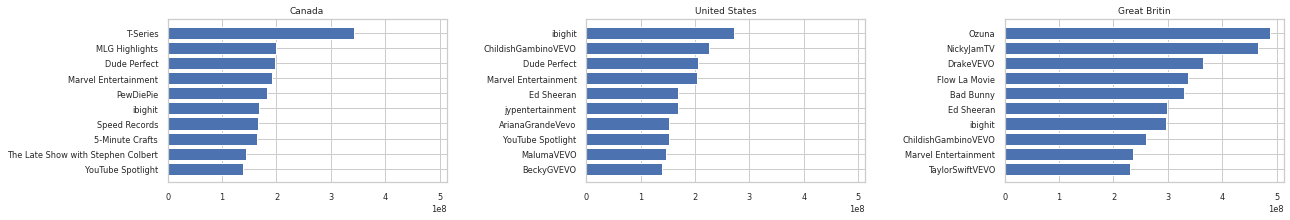

In [23]:
#@title Top 10 most view channel
df = final_df.groupby(by=['channel_title', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['channel_title'], as_index=False)\
    ['views'].sum('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
# df.head()
fig, axs = plt.subplots(figsize=(20,5))
rects = axs.bar(df['channel_title'].tolist(), df['views'].tolist())
fig.suptitle(' ')
for rect in rects:
    height = rect.get_height()
    axs.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

ca = final_df[final_df.country.eq('CA')].groupby(by=['channel_title', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['channel_title'], as_index=False)\
    ['views'].sum('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
us = final_df[final_df.country.eq('US')].groupby(by=['channel_title', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['channel_title'], as_index=False)\
    ['views'].sum('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
gb = final_df[final_df.country.eq('GB')].groupby(by=['channel_title', 'video_id'], as_index=False)\
    ['views'].max('views').groupby(by=['channel_title'], as_index=False)\
    ['views'].sum('views').sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(20, 3), sharey=False, sharex=True)
plt.subplots_adjust(wspace=0.5)
axs[0].barh(ca.channel_title, ca.views)
axs[0].title.set_text('Canada')
axs[1].barh(us.channel_title, us.views)
axs[1].title.set_text('United States')
axs[2].barh(gb.channel_title, gb.views)
axs[2].title.set_text('Great Britin')
# fig.suptitle('Top channel in each country')


#### 3. How many likes and dislikes do the top 10 trending videos have in each country, and overall (top 10 based on final number of views)?

[0 1 2 3 4 5 6 7 8 9] 0.3


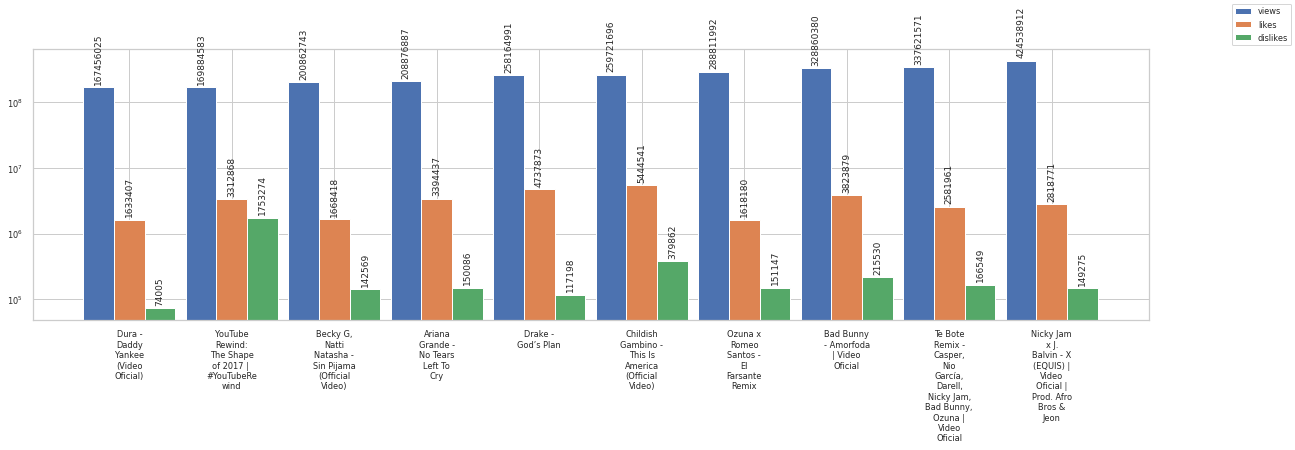

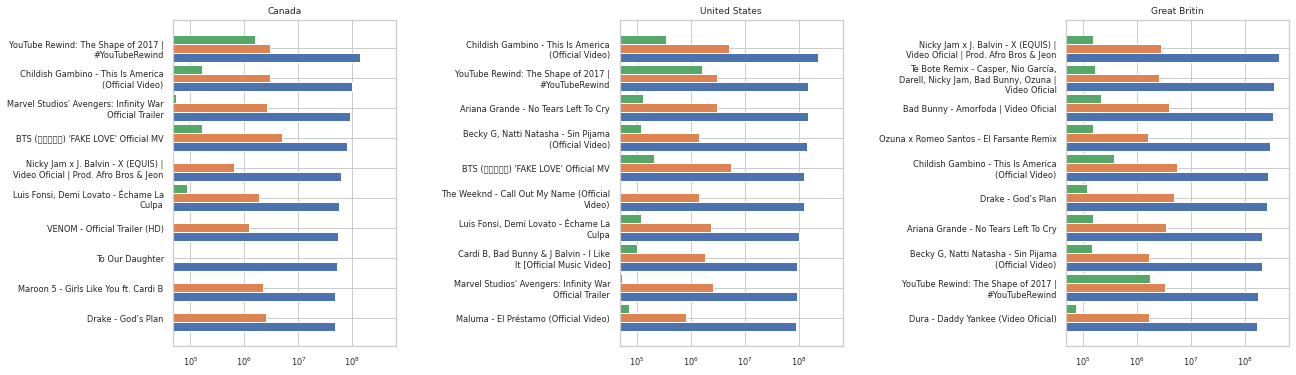

In [24]:
from textwrap import wrap
df = final_df.groupby(by=['title'], as_index=False).max(['views', 'likes', 'dislikes'])\
    .sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
fig, axs = plt.subplots(figsize=(20,5))
width = 0.3

ind = np.arange(len(df['title'].tolist()))
print(ind,width)
rect1 = axs.bar(
    ind-((width/3)*3),
    df['views'].tolist(),
    width,
    label='views',
    
)
rect2 = axs.bar(
    ind,
    (df['likes'].tolist()),
    width,
    label='likes'
)
rect3 = axs.bar(
    ind+((width/3)*3),
    df['dislikes'].tolist(),
    width,
    label='dislikes'
)

axs.set_xticks(range(0,10))
axs.set_xticklabels(['\n'.join(wrap(l,10)) for l in df['title'].tolist()])
axs.set_yscale('log')

fig.suptitle(' ')
fig.legend()
for rect in rect1:
    height = rect.get_height()
    axs.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom',rotation='vertical')

for rect in rect2:
    height = rect.get_height()
    axs.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom', rotation='vertical')
    
for rect in rect3:
    height = rect.get_height()
    axs.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom', rotation='vertical')


ca = final_df[final_df.country.eq('CA')].groupby(by=['title'], as_index=False)\
    .max(['views', 'likes', 'dislikes'])\
    .sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)


final_df[final_df.country.eq('CA')].groupby(by=['title'], as_index=False).max('views')\
    .sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)

gb = final_df[final_df.country.eq('GB')].groupby(by=['title'], as_index=False).max('views')\
    .sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)
us = final_df[final_df.country.eq('US')].groupby(by=['title'], as_index=False).max('views')\
    .sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop('index', axis=1)

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=False, sharex=True)
plt.subplots_adjust(wspace=1)

highet = 0.2
axs[0].barh(ind-((width/3)*3),
            ca.views,
            width,
            label='views')
axs[0].barh(ind,
            ca.likes,
            width,
            label='likes')
axs[0].barh(ind+((width/3)*3),
            ca.dislikes,
            width,
            label='dislikes')
axs[0].title.set_text('Canada')
axs[0].set_yticks(range(0,10))
axs[0].set_yticklabels(['\n'.join(wrap(l,40)) for l in ca.title.tolist()])
axs[0].set_xscale('log')

axs[1].barh(ind-((width/3)*3),
            us.views,
            width,
            label='views')
axs[1].barh(ind,
            us.likes,
            width,
            label='likes')
axs[1].barh(ind+((width/3)*3),
            us.dislikes,
            width,
            label='dislikes')
# axs[1].barh(['\n'.join(wrap(l, 40)) for l in us.title.tolist()], us.views)
axs[1].title.set_text('United States')
axs[1].set_yticks(range(0,10))
axs[1].set_yticklabels(['\n'.join(wrap(l,40)) for l in us.title.tolist()])
axs[1].set_xscale('log')

axs[2].barh(ind-((width/3)*3),
            gb.views,
            width,
            label='views')
axs[2].barh(ind,
            gb.likes,
            width,
            label='likes')
axs[2].barh(ind+((width/3)*3),
            gb.dislikes,
            width,
            label='dislikes')
# axs[2].barh(['\n'.join(wrap(l, 40)) for l in gb.title.tolist()], gb.views)
axs[2].title.set_text('Great Britin')
axs[2].set_yticks(range(0,10))
axs[2].set_yticklabels(['\n'.join(wrap(l,40)) for l in gb.title.tolist()])
axs[2].set_xscale('log')
# fig.suptitle('Top channel in each country')


#### 4. How many videos have more than 100 million views on their final trending day in each country and overall?

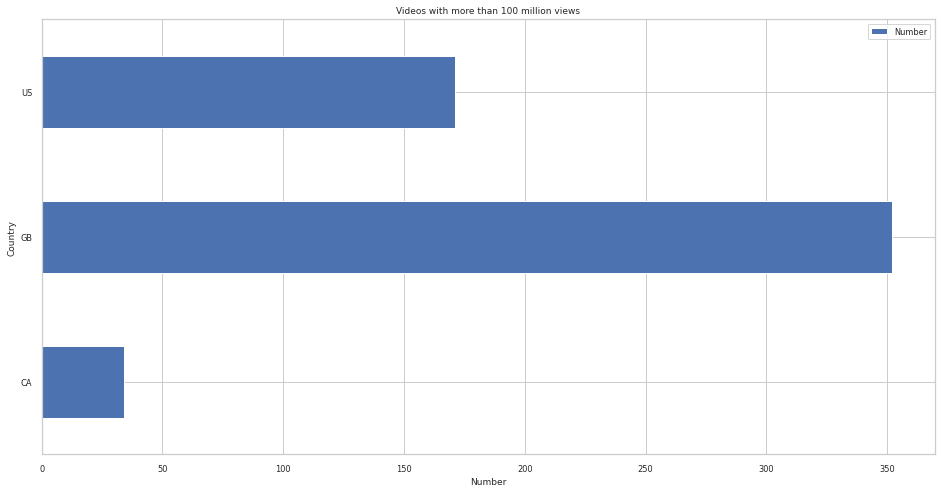

In [25]:
morethan = final_df.groupby(by=['title', 'country'])['views', 'video_id']\
              .sum('views')\
              .sort_values(by='views', ascending=False)\

plotgraph = morethan[morethan['views'] >= 100000000].groupby(by=['country'])\
    .count()\
    .plot.barh(
        title='Videos with more than 100 million views',
    )

plotgraph.set_xlabel('Number')
plotgraph.set_ylabel('Country')
plotgraph.legend(['Number'])

#### 5. What are the top 10 hashtags overall and in each country based on the videos' final view count?

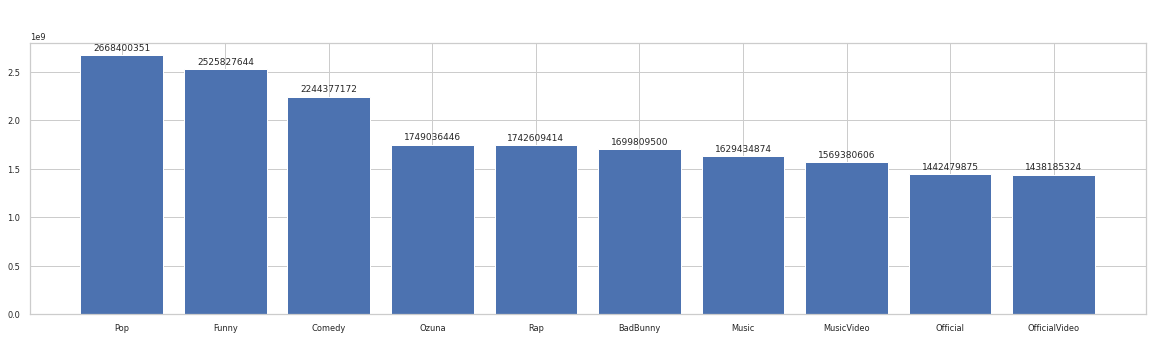

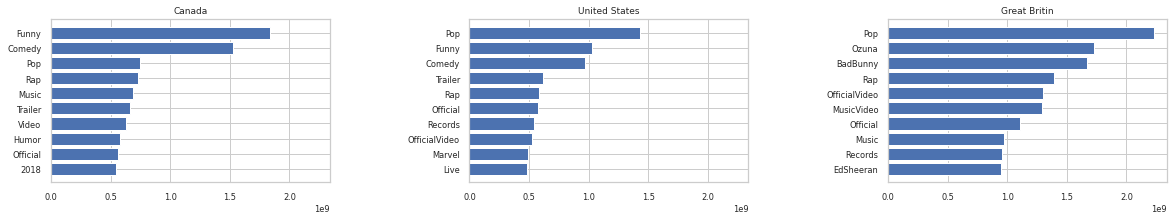

In [26]:
unnested = final_df
unnested.tags = unnested.tags.fillna({t: [] for t in final_df.index})
unnested = unnested.explode('tags').groupby(['tags', 'video_id'], as_index=False).max('views')[['tags','views']]
unnested['tags'] = unnested['tags'].str.title().values
unnested['tags'] = unnested['tags'].str.replace(' ', '').values
unnested = unnested[~unnested.tags.isin(['','[None]', None,])]

grouped = unnested.groupby(by=['tags'], as_index=False)\
    .sum().sort_values(by='views', ascending=False)\
    .reset_index().drop('index', axis=1).head(10)
grouped.head()


fig, axs = plt.subplots(figsize=(20,5))
rects = axs.bar(grouped['tags'].tolist(), grouped['views'].tolist())
fig.suptitle(' ')
for rect in rects:
    height = rect.get_height()
    axs.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

    
country_unnested = final_df
country_unnested.tags = country_unnested.tags.fillna({t: [] for t in final_df.index})
country_unnested = country_unnested.explode('tags').groupby(['tags', 'video_id', 'country'], as_index=False).max('views')[['tags','views','country']]
country_unnested['tags'] = country_unnested['tags'].str.title().values
country_unnested['tags'] = country_unnested['tags'].str.replace(' ', '').values
country_unnested = country_unnested[~country_unnested.tags.isin(['','[None]', None,])]

country_grouped = country_unnested.groupby(by=['tags', 'country'], as_index=False)\
    .sum().sort_values(by='views', ascending=False)\
    .reset_index().drop('index', axis=1)


ca = country_grouped[country_grouped.country.eq('CA')].sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop(columns=['index'])
us = country_grouped[country_grouped.country.eq('US')].sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop(columns=['index'])
gb = country_grouped[country_grouped.country.eq('GB')].sort_values(by='views', ascending=False)\
    .head(10).sort_values(by='views').reset_index().drop(columns=['index'])

fig, axs = plt.subplots(1, 3, figsize=(20, 3), sharey=False, sharex=True)
plt.subplots_adjust(wspace=0.5)
axs[0].barh(ca.tags, ca.views)
axs[0].title.set_text('Canada')
axs[1].barh(us.tags, us.views)
axs[1].title.set_text('United States')
axs[2].barh(gb.tags, gb.views)
axs[2].title.set_text('Great Britin')

# Conclusion
This study found that there is a significant relationship between the views and likes on Youtube. A correlation method is used to prove the strong correlation between the two variables, and it was found that the two variables are highly correlated positively with one another. In other words, as the views increase, the likes number also increases significantly. After the correlation between views and likes has been established, the analysis was able to continue in finding the regression model. Based on the result shows that it indicated the variation in likes is reduced by 64.7% when the number of views is considered. P-value is less than 0.05, which means that it is quite significant between views and likes based on data on Youtube. The people in the country who view the channel on youtube click more likes based on the channel they're viewing on Youtube.


# Citation

* Green, Dennis. “The Most Popular Social Media Platforms with Gen Z.” Business Insider, Business Insider, 2 July 2019, www.businessinsider.com/gen-z-loves-snapchat-instagram-and-youtube-social-media-2019-6.

* Thelwall, Mike & Sud, Pardeep & Vis, Farida. (2012). Commenting on YouTube Videos: From Guatemalan Rock to El Big Bang. Journal of the American Society for Information Science and Technology. 63. 616-629. 10.1002/asi.21679. 

* Bartl, M. (2018). YouTube channels, uploads and views: A statistical analysis of the past 10 years. Convergence: The International Journal of Research Into New Media Technologies, 24(1), 16-32.

* Amudha, S., Niveditha, V. R., & Shanthanam, R. R. (2020).  YouTube Trending Video Metadata Analysis Using Machine Learning. International Journal of Advanced Science and Technology, 29(7), 3028-3037.

* Krishna, A., Zambreno J., & Krishnan S. (2013). Polarity Trend Analysis of Public Sentiment on YouTube. Iowa State University.

* Merla, P., & Liang, Y. (2017). Data Analysis using Hadoop MapReduce Environment. IEEE International Conference on Big Data (Big Data), 4783-4785.

* Pinto, H., Almeida, J. M., & Goncalves, M, A. (2013). Using Early View Patterns to Predict the Popularity of YouTube Videos. WSDM 2013 - Proceedings of the 6th ACM International Conference on Web Search and Data Mining, 365-374.

* Poche, E., Jha, N., Williams, G., Staten, J., Vesper, M., & Mahmoud, A. (2017). Analyzing User Comments on YouTube Coding Tutorial Videos. IEEE 25th International Conference on Program Comprehension (ICPC), 196-206.

* Nima, P. (2019). Exploration of YouTube Statistics Data using Hadoop Technologies. National College of Ireland.
